# Install all the dependencies

In [ ]:
!pip install qiskit==1.1.0 qiskit-aer==0.14.2 qiskit-machine-learning==0.8.2

In [ ]:
!pip install imblearn qiskit-algorithms


In [ ]:
!pip install qiskit-algorithms


In [ ]:
# data preprocessing imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Qiskit Imports (compatible with 1.1.0)
from qiskit.circuit.library import ZZFeatureMap, RealAmplitudes
from qiskit_algorithms.optimizers import COBYLA
from qiskit.primitives import Sampler
from qiskit_machine_learning.algorithms.classifiers import VQC
from qiskit_aer.primitives import Sampler as AerSampler
from qiskit_aer import AerSimulator
from qiskit_machine_learning.kernels import FidelityQuantumKernel



from qiskit import QuantumCircuit
from qiskit_machine_learning.state_fidelities import ComputeUncompute
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from qiskit.circuit import ParameterVector
from IPython.display import display


In [ ]:
import importlib
import inspect
import pkgutil

def check_module_for_class(module_name, class_name):
    try:
        module = importlib.import_module(module_name)
        for name, obj in inspect.getmembers(module):
            if name == class_name:
                return True

        # Check submodules
        if hasattr(module, '__path__'):
            for _, submodule_name, _ in pkgutil.iter_modules(module.__path__, module.__name__ + '.'):
                if check_module_for_class(submodule_name, class_name):
                    print(f"Found {class_name} in {submodule_name}")
                    return True
    except Exception as e:
        pass
    return "no where to be found"

# Check all qiskit modules
qiskit_modules = ['qiskit', 'qiskit_aer', 'qiskit_algorithms', 'qiskit_machine_learning']
for module in qiskit_modules:
    check_module_for_class(module, 'QuantumInstance')

Found QuantumInstance in qiskit._accelerate
Found QuantumInstance in qiskit_aer.aererror
Found QuantumInstance in qiskit_algorithms.algorithm_job
Found QuantumInstance in qiskit_machine_learning.algorithm_job


In [ ]:
# Let's examine the contents of the algorithm_job module to understand what's there
import inspect
from qiskit_machine_learning import algorithm_job

# Print all members of the module
for name, obj in inspect.getmembers(algorithm_job):
    print(f"{name}: {type(obj)}")

AlgorithmJob: <class 'abc.ABCMeta'>
PrimitiveJob: <class 'abc.ABCMeta'>
__builtins__: <class 'dict'>
__cached__: <class 'str'>
__doc__: <class 'str'>
__file__: <class 'str'>
__loader__: <class '_frozen_importlib_external.SourceFileLoader'>
__name__: <class 'str'>
__package__: <class 'str'>
__spec__: <class '_frozen_importlib.ModuleSpec'>


In [ ]:
#preview import versions
import qiskit
import qiskit_machine_learning
print(qiskit_machine_learning.__version__)
print(qiskit.__version__)

0.8.2
1.1.0


# import Dataset

In [ ]:
!gdown --fuzzy https://drive.google.com/file/d/1iuhrtVJIhJ4xPlrNmUL570gBUoozB3YJ/view?usp=sharing

Downloading...
From: https://drive.google.com/uc?id=1iuhrtVJIhJ4xPlrNmUL570gBUoozB3YJ
To: /content/NYPD_cleaned_data.csv
100% 11.2M/11.2M [00:00<00:00, 218MB/s]


In [ ]:
NYPD_Smalldf = pd.read_csv('NYPD_cleaned_data.csv',index_col = 0).sample(frac = 0.001)

In [ ]:
NYPD_Smalldf.shape

(36, 29)

In [ ]:
NYPD_Smalldf.head(3)

,CMPLNT_NUM,CMPLNT_FR_DT,CMPLNT_FR_TM,RPT_DT,OFNS_DESC,PD_DESC,CRM_ATPT_CPTD_CD,LAW_CAT_CD,BORO_NM,LOC_OF_OCCUR_DESC,...,Month_Abbr,Year,ADDR_PCT_CD,KY_CD,PD_CD,JURISDICTION_CODE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude
170364,206867048,2019-12-28,21:30:00,12/29/2019,OFFENSES AGAINST THE PERSON,"IMPRISONMENT 2,UNLAWFUL",COMPLETED,MISDEMEANOR,QUEENS,INSIDE,...,Dec,2019,110.0,355.0,181.0,0.0,1025123.0,209292.0,6.748557e+12,-0.16099
157818,55763519,2009-01-05,13:15:00,01/15/2009,ASSAULT 3 & RELATED OFFENSES,ASSAULT 3,COMPLETED,MISDEMEANOR,BRONX,INSIDE,...,Jan,2009,44.0,344.0,101.0,0.0,1008923.0,245472.0,6.886164e+12,-0.16099
180714,252577467,2022-10-12,16:00:00,10/13/2022,PETIT LARCENY,"LARCENY,PETIT FROM AUTO",COMPLETED,MISDEMEANOR,MANHATTAN,FRONT OF,...,Oct,2022,33.0,341.0,321.0,0.0,1001144.0,246888.0,6.891621e+12,-0.16099


In [ ]:

NYPD_Smalldf = pd.read_csv('NYPD_cleaned_data.csv', low_memory=False, index_col = 0)
NYPD_Smalldf = NYPD_Smalldf[(NYPD_Smalldf['BORO_NM'] != 'UNKOWN') & (NYPD_Smalldf['LOC_OF_OCCUR_DESC'] != 'UNKOWN')]

In [ ]:

NYPD_Smalldf['RPT_DT'] = pd.to_datetime(NYPD_Smalldf['RPT_DT'])

NYPD_Smalldf['RPT_YEAR'] = NYPD_Smalldf['RPT_DT'].dt.year
NYPD_Smalldf['RPT_MONTH'] = NYPD_Smalldf['RPT_DT'].dt.month
NYPD_Smalldf['RPT_DAY'] = NYPD_Smalldf['RPT_DT'].dt.day
NYPD_Smalldf['RPT_DAY_OF_WEEK'] = NYPD_Smalldf['RPT_DT'].dt.dayofweek
NYPD_Smalldf['RPT_IS_WEEKEND'] = NYPD_Smalldf['RPT_DAY_OF_WEEK'].isin([5, 6]).astype(int)


In [ ]:
NYPD_Smalldf['CMPLNT_FR_DT'] = pd.to_datetime(NYPD_Smalldf['CMPLNT_FR_DT'])
NYPD_Smalldf['REPORT_DELAY'] = (NYPD_Smalldf['RPT_DT'] - NYPD_Smalldf['CMPLNT_FR_DT']).dt.days
NYPD_Smalldf['REPORT_DELAY'] = NYPD_Smalldf['REPORT_DELAY'].fillna(0).clip(lower=0)


In [ ]:
def time_of_day(hour):
    if 6 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 18:
        return 'Afternoon'
    elif 18 <= hour < 24:
        return 'Evening'
    else:
        return 'Night'

NYPD_Smalldf['CMPLNT_FR_TM'] = pd.to_datetime(NYPD_Smalldf['CMPLNT_FR_TM'])
NYPD_Smalldf['Hour'] = NYPD_Smalldf['CMPLNT_FR_TM'].dt.hour
NYPD_Smalldf['Time_Category'] = NYPD_Smalldf['Hour'].apply(time_of_day)

<ipython-input-15-ca0f05bdae02>:11: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  NYPD_Smalldf['CMPLNT_FR_TM'] = pd.to_datetime(NYPD_Smalldf['CMPLNT_FR_TM'])
<ipython-input-15-ca0f05bdae02>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  NYPD_Smalldf['CMPLNT_FR_TM'] = pd.to_datetime(NYPD_Smalldf['CMPLNT_FR_TM'])
<ipython-input-15-ca0f05bdae02>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returni

#  Variational Quantum Classifier

Feature Map Circuit:


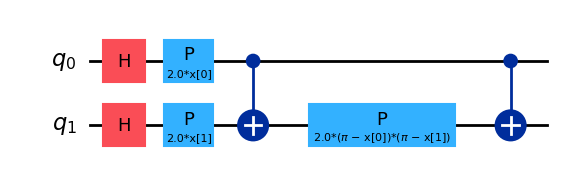

Ansatz Circuit:


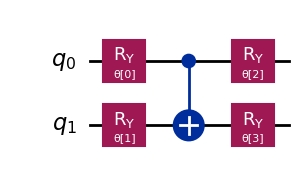

Combined Circuit (Feature Map + Ansatz) for a Sample Input:


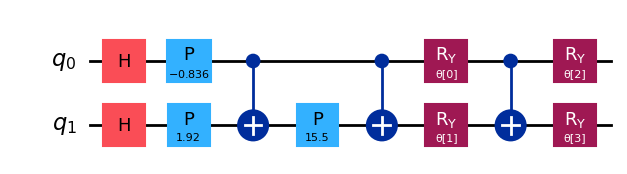

     ┌───┐┌─────────────┐                                          
q_0: ┤ H ├┤ P(2.0*x[0]) ├──■────────────────────────────────────■──
     ├───┤├─────────────┤┌─┴─┐┌──────────────────────────────┐┌─┴─┐
q_1: ┤ H ├┤ P(2.0*x[1]) ├┤ X ├┤ P(2.0*(π - x[0])*(π - x[1])) ├┤ X ├
     └───┘└─────────────┘└───┘└──────────────────────────────┘└───┘
     ┌──────────┐     ┌──────────┐
q_0: ┤ Ry(θ[0]) ├──■──┤ Ry(θ[2]) ├
     ├──────────┤┌─┴─┐├──────────┤
q_1: ┤ Ry(θ[1]) ├┤ X ├┤ Ry(θ[3]) ├
     └──────────┘└───┘└──────────┘

 VQC Accuracy: 0.51

Classification Report:
               precision    recall  f1-score   support

           0       0.52      0.66      0.58      3930
           1       0.53      0.38      0.44      3930

    accuracy                           0.52      7860
   macro avg       0.52      0.52      0.51      7860
weighted avg       0.52      0.52      0.51      7860

Confusion Matrix:
 [[2609 1321]
 [2445 1485]]


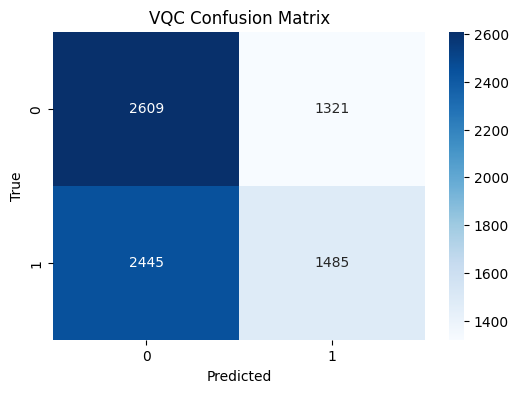

CPU times: user 17h 50min, sys: 15.4 s, total: 17h 50min 15s
Wall time: 12min 57s


In [ ]:
%%time
'''

Quantum Machine Learning Pipeline using Qiskit:

This code performs the following steps:
- Loads and prepares NYPD crime data by encoding categorical variables, fixing class imbalance with oversampling, scaling, and reducing dimensions with PCA.
- Trains a Variational Quantum Classifier (VQC) using a 2D input and binary target (FELONY vs. non-FELONY).
- Uses a ZZFeatureMap for quantum feature encoding and a RealAmplitudes ansatz.
- Displays the quantum circuit constructed for a single training input.
- Outputs accuracy of the trained quantum model on the test set and visualizes the full circuit (feature map + ansatz) in both graphical and text form.

Expected Output:
- Trained quantum model
- Accuracy score (typically depends on data)
- Graphical display of the quantum circuit for a sample input
- Text-based quantum circuit layout

'''


y_binary = NYPD_Smalldf['LAW_CAT_CD'].map(lambda x: 1 if x == 'FELONY' else 0)

X_simple = NYPD_Smalldf[['CRM_ATPT_CPTD_CD', 'LOC_OF_OCCUR_DESC','PREM_TYP_DESC']].copy()


encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
X_encoded = encoder.fit_transform(X_simple)


rus = RandomOverSampler(sampling_strategy="auto", random_state=42)
X_resampled, y_resampled = rus.fit_resample(X_encoded, y_binary)


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_resampled)


pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

X_train, X_test, y_train, y_test = train_test_split(
    X_pca, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled)


feature_map = ZZFeatureMap(feature_dimension=2, reps=1)
ansatz = RealAmplitudes(num_qubits=2, reps=1)
optimizer = COBYLA(maxiter=15)
sampler = AerSampler()


print("Feature Map Circuit:")
display(feature_map.decompose().draw('mpl'))


print("Ansatz Circuit:")
display(ansatz.decompose().draw('mpl'))


vqc = VQC(
    feature_map=feature_map,
    ansatz=ansatz,
    optimizer=optimizer,
    sampler=sampler)


print("Combined Circuit (Feature Map + Ansatz) for a Sample Input:")
sample_input = X_train[1]
bound_feature_map = feature_map.assign_parameters(sample_input)
combined_circuit = bound_feature_map.compose(ansatz)
display(combined_circuit.decompose().draw('mpl'))


vqc.fit(X_train, y_train.to_numpy())


y_pred = vqc.predict(X_test)
y_test_array = y_test.to_numpy()
accuracy = vqc.score(X_test, y_test_array)


# text outputs
print(feature_map.decompose().draw('text'))
print(ansatz.decompose().draw('text'))


print(f"\n VQC Accuracy: {accuracy:.2f}")
print("\nClassification Report:\n", classification_report(y_test_array , y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test_array, y_pred))


plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test_array , y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("VQC Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# QNN

In [ ]:
# 💡 Standard Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 💡 Data Preprocessing
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from imblearn.over_sampling import RandomOverSampler

# 💡 PyTorch
import torch
import torch.nn as nn

# 💡 Qiskit
from qiskit.circuit.library import ZZFeatureMap, TwoLocal
from qiskit import QuantumCircuit
from qiskit_machine_learning.neural_networks import EstimatorQNN
from qiskit_machine_learning.connectors import TorchConnector

# 🚨 Load your NYPD dataset (ensure this DataFrame is already defined)
# NYPD_Smalldf = pd.read_csv('your_nypd_data.csv')

# ---------------------------------------
# 🧹 1. Data Preprocessing
# ---------------------------------------
# Target: FELONY vs NON-FELONY
y_binary = NYPD_Smalldf['LAW_CAT_CD'].map(lambda x: 1 if x == 'FELONY' else 0)

# Use two categorical features
X_simple = NYPD_Smalldf[['CRM_ATPT_CPTD_CD', 'LOC_OF_OCCUR_DESC']].copy()

# One-hot encode categorical variables
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
X_encoded = encoder.fit_transform(X_simple)

# Balance classes
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X_encoded, y_binary)

# Standardize
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_resampled)

# PCA to reduce to 2D input for QNN
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(
    X_pca, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled
)

# Convert to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).unsqueeze(1)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32).unsqueeze(1)

# ---------------------------------------
# 🧠 2. Build Quantum Neural Network
# ---------------------------------------
num_inputs = 2

# Feature map and ansatz for QNN
feature_map = ZZFeatureMap(feature_dimension=num_inputs, reps=1)
ansatz = TwoLocal(num_qubits=num_inputs, rotation_blocks='ry', entanglement_blocks='cz', reps=1)

# Combine into a circuit
qc = QuantumCircuit(num_inputs)
qc.compose(feature_map, inplace=True)
qc.compose(ansatz, inplace=True)

# Define QNN
qnn = EstimatorQNN(
    circuit=qc,
    input_params=feature_map.parameters,
    weight_params=ansatz.parameters
)

# Connect QNN to PyTorch
model = TorchConnector(qnn)

# ---------------------------------------
# 🧪 3. Train the QNN
# ---------------------------------------
loss_fn = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

epochs = 10
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    predictions = model(X_train_tensor)
    loss = loss_fn(predictions, y_train_tensor)
    loss.backward()
    optimizer.step()
    print(f"Epoch {epoch + 1}/{epochs} - Loss: {loss.item():.4f}")

# ---------------------------------------
# 📊 4. Evaluate the QNN
# ---------------------------------------
model.eval()
with torch.no_grad():
    y_pred = model(X_test_tensor).numpy()

# Binarize predictions
y_pred_binary = (y_pred > 0.5).astype(int).flatten()
y_test_array = y_test_tensor.numpy().flatten()

# Accuracy
accuracy = accuracy_score(y_test_array, y_pred_binary)
print(f"\n✅ QNN Accuracy: {accuracy:.2f}")

# Classification report
print("\nClassification Report:\n", classification_report(y_test_array, y_pred_binary))

# Confusion matrix
cm = confusion_matrix(y_test_array, y_pred_binary)
print("Confusion Matrix:\n", cm)

# Plot Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Purples')
plt.title("QNN Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


<ipython-input-41-d13d7153454b>:78: DeprecationWarning: V1 Primitives are deprecated as of qiskit-machine-learning 0.8.0 and will be removed no sooner than 4 months after the release date. Use V2 primitives for continued compatibility and support.
  qnn = EstimatorQNN(


Epoch 1/10 - Loss: 0.7816
Epoch 2/10 - Loss: 0.7727
Epoch 3/10 - Loss: 0.7639
Epoch 4/10 - Loss: 0.7552
Epoch 5/10 - Loss: 0.7466
Epoch 6/10 - Loss: 0.7380
Epoch 7/10 - Loss: 0.7296
Epoch 8/10 - Loss: 0.7213


# Quantum Support Vector Classifier

In [ ]:

# 1. Binary target (FELONY vs NON-FELONY for QSVM)
y_binary = NYPD_Smalldf['LAW_CAT_CD'].map(lambda x: 1 if x == 'FELONY' else 0)

# 2. Feature selection
X_simple = NYPD_Smalldf[['REPORT_DELAY', 'Y_COORD_CD']].copy()


In [ ]:

# 3. Class balancing
rus = RandomOverSampler(random_state=42)
X_resampled, y_resampled = rus.fit_resample(X_simple, y_binary)

# 4. Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_resampled)  # Corrected to fit_transform

In [ ]:
# Assume X_scaled and y_resampled are defined from your preprocessing steps.
# For example:
# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X_resampled)  # where X_resampled, y_resampled come from oversampling

# 5. Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled
)

# 6. Quantum kernel with Fidelity and AerSimulator
feature_map = ZZFeatureMap(feature_dimension=2, reps=1)  # lower reps for faster execution

# Set up the quantum simulator (using statevector for speed)
simulator = AerSimulator(method='statevector')

# Create the Sampler primitive (no backend argument needed)
sampler = Sampler()

# Create the fidelity instance using ComputeUncompute
fidelity = ComputeUncompute(sampler=sampler)

# Now create the fidelity-based quantum kernel using your feature map and fidelity
quantum_kernel = FidelityQuantumKernel(
    feature_map=feature_map,
    fidelity=fidelity
)



<ipython-input-20-5d0e860f4497>:21: DeprecationWarning: V1 Primitives are deprecated as of qiskit-machine-learning 0.8.0 and will be removed no sooner than 4 months after the release date. Use V2 primitives for continued compatibility and support.
  fidelity = ComputeUncompute(sampler=sampler)


In [ ]:
from qiskit_machine_learning.algorithms.classifiers import QSVC

# 7. QSVM model
qsvc = QSVC(quantum_kernel=quantum_kernel)
qsvc.fit(X_train, y_train)
# 8. Predict and evaluate
y_pred = qsvc.predict(X_test)
accuracy = qsvc.score(X_test, y_test)

print(f"QSVM Accuracy: {accuracy:.2f}")


NameError: name 'quantum_kernel' is not defined


✅ QSVM Accuracy: 0.51

Classification Report:
               precision    recall  f1-score   support

           0       0.52      0.49      0.50      3930
           1       0.52      0.55      0.53      3930

    accuracy                           0.52      7860
   macro avg       0.52      0.52      0.52      7860
weighted avg       0.52      0.52      0.52      7860

Confusion Matrix:
 [[1910 2020]
 [1779 2151]]


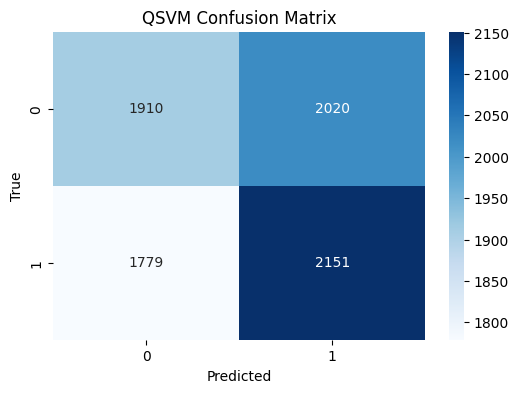

In [ ]:
print(f"\n✅ QSVM Accuracy: {accuracy:.2f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# 9. Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("QSVM Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()